#📌 Extracción

In [10]:
import requests
import pandas as pd

url ="https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

#🔧 Transformación

In [6]:
# Exploracion
print("Columnas del dataset:")
print(df.columns)

print("\nInformación general:")
df.info()

# transformacion

if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# elimina valoreas nulos
df = df.dropna()

# conversion en variables objetivo.
if 'Churn' in df.columns:
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

columnas_binarias = [
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling'
]

for col in columnas_binarias:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})


df = df.rename(columns={
    'tenure': 'Meses_Cliente',
    'MonthlyCharges': 'Cargo_Mensual',
    'TotalCharges': 'Cargo_Total'
})


if 'Contract' in df.columns:
    df['Contract'] = df['Contract'].replace({
        'Month-to-month': 'Mensual',
        'One year': 'Anual',
        'Two year': 'Bianual'
    })


print("\nDataset transformado:")
df.info()
print(df.head())


Columnas del dataset:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerID  7043 non-null   object 
 1   Churn       0 non-null      float64
 2   customer    7043 non-null   object 
 3   phone       7043 non-null   object 
 4   internet    7043 non-null   object 
 5   account     7043 non-null   object 
dtypes: float64(1), object(5)
memory usage: 385.2+ KB

Dataset transformado:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  0 non-null      object
 1   Churn       0 non-null      int64 
 2   customer    0 non-null      object
 3   phone       0 non-null      object
 4   internet    0 non-null     

#📊 Carga y análisis

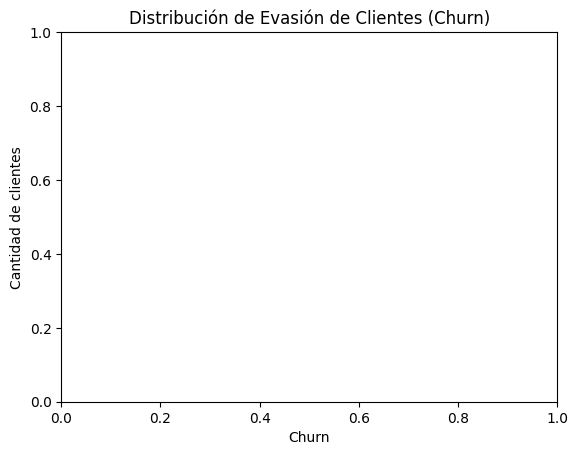

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Churn")
plt.title("Distribución de Evasión de Clientes (Churn)")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")
plt.show()



In [37]:

# EXTRACCIÓN DE VARIABLES ANIDADAS

df['Meses_Cliente'] = df['account'].apply(lambda x: x.get('tenure') if isinstance(x, dict) else None)
df['Cargo_Mensual'] = df['account'].apply(lambda x: x.get('MonthlyCharges') if isinstance(x, dict) else None)
df['Cargo_Total'] = df['account'].apply(lambda x: x.get('TotalCharges') if isinstance(x, dict) else None)

df['Cargo_Total'] = df['Cargo_Total'].replace('', 0)
# CONVERSIÓN A NUMÉRICO


df['Meses_Cliente'] = pd.to_numeric(df['Meses_Cliente'], errors='coerce')
df['Cargo_Mensual'] = pd.to_numeric(df['Cargo_Mensual'], errors='coerce')
df['Cargo_Total'] = pd.to_numeric(df['Cargo_Total'], errors='coerce')


# LIMPIEZA DE NULOS


df = df.dropna(subset=['Meses_Cliente', 'Cargo_Mensual', 'Cargo_Total'])


# ANÁLISIS DESCRIPTIVO


print(" Permanencia del cliente (Meses_Cliente):")
print(df['Meses_Cliente'].agg(['mean', 'median', 'std', 'min', 'max']))

print("\n Cargo mensual:")
print(df['Cargo_Mensual'].agg(['mean', 'median', 'std', 'min', 'max']))

print("\n Cargo total:")
print(df['Cargo_Total'].agg(['mean', 'median', 'std', 'min', 'max']))


 Permanencia del cliente (Meses_Cliente):
mean     NaN
median   NaN
std      NaN
min      NaN
max      NaN
Name: Meses_Cliente, dtype: float64

 Cargo mensual:
mean     NaN
median   NaN
std      NaN
min      NaN
max      NaN
Name: Cargo_Mensual, dtype: float64

 Cargo total:
mean     NaN
median   NaN
std      NaN
min      NaN
max      NaN
Name: Cargo_Total, dtype: float64


In [33]:

# EXTRACCIÓN DE VARIABLES CATEGÓRICAS


# Género (desde customer)
df['Genero'] = df['customer'].apply(
    lambda x: x.get('gender') if isinstance(x, dict) else None
)

# Tipo de contrato (desde account)
df['Tipo_Contrato'] = df['account'].apply(
    lambda x: x.get('Contract') if isinstance(x, dict) else None
)

# Método de pago (desde account)
df['Metodo_Pago'] = df['account'].apply(
    lambda x: x.get('PaymentMethod') if isinstance(x, dict) else None
)


# LIMPIEZA DE NULOS

df_cat = df.dropna(subset=['Genero', 'Tipo_Contrato', 'Metodo_Pago', 'Churn'])


# ANÁLISIS DE EVASIÓN POR VARIABLES CATEGÓRICAS


print(" Evasión según género:")
print(df_cat.groupby('Genero')['Churn'].mean())

print("\n Evasión según tipo de contrato:")
print(df_cat.groupby('Tipo_Contrato')['Churn'].mean())

print("\n Evasión según método de pago:")
print(df_cat.groupby('Metodo_Pago')['Churn'].mean())


 Evasión según género:
Series([], Name: Churn, dtype: object)

 Evasión según tipo de contrato:
Series([], Name: Churn, dtype: object)

 Evasión según método de pago:
Series([], Name: Churn, dtype: object)


 Comparación estadística por evasión (Churn):
Empty DataFrame
Columns: [(Meses_Cliente, mean), (Meses_Cliente, median), (Meses_Cliente, std), (Meses_Cliente, min), (Meses_Cliente, max), (Cargo_Mensual, mean), (Cargo_Mensual, median), (Cargo_Mensual, std), (Cargo_Mensual, min), (Cargo_Mensual, max), (Cargo_Total, mean), (Cargo_Total, median), (Cargo_Total, std), (Cargo_Total, min), (Cargo_Total, max)]
Index: []


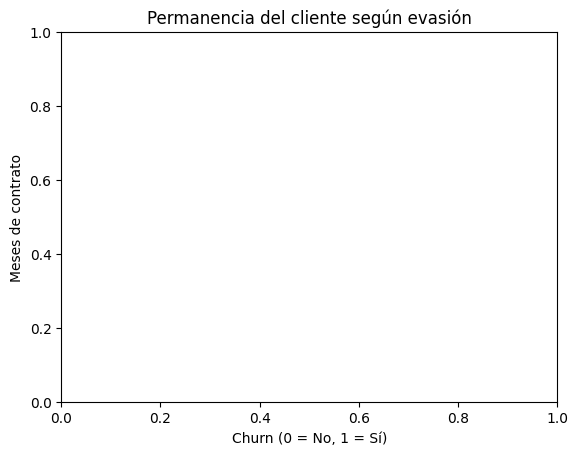

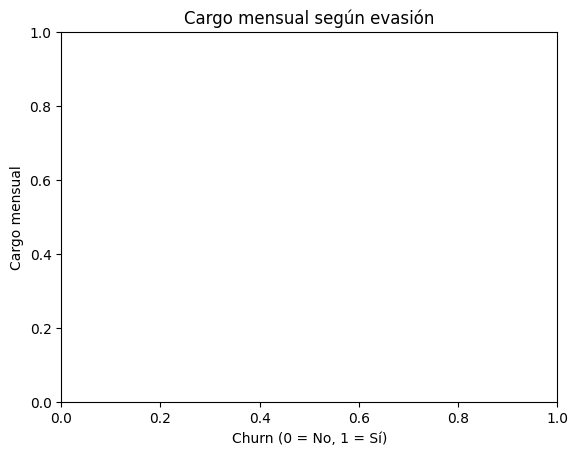

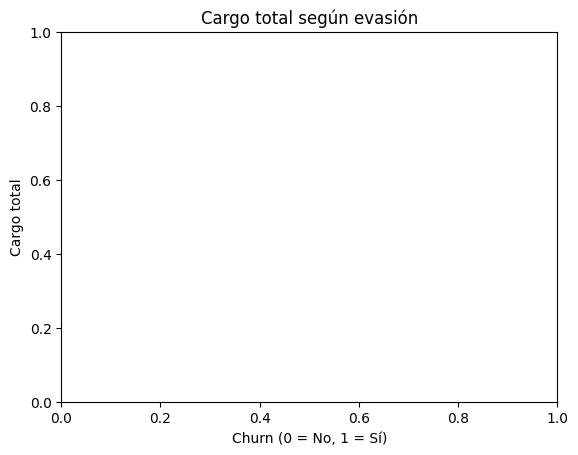

In [35]:

# COMPARACIÓN DE VARIABLES NUMÉRICAS SEGÚN CHURN


# Estadísticas por grupo (evasión vs no evasión)
print(" Comparación estadística por evasión (Churn):")
print(
    df.groupby('Churn')[['Meses_Cliente', 'Cargo_Mensual', 'Cargo_Total']]
    .agg(['mean', 'median', 'std', 'min', 'max'])
)

# VISUALIZACIONES

import seaborn as sns
import matplotlib.pyplot as plt

# Permanencia del cliente
plt.figure()
sns.boxplot(data=df, x='Churn', y='Meses_Cliente')
plt.title("Permanencia del cliente según evasión")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Meses de contrato")
plt.show()

# Cargo mensual
plt.figure()
sns.boxplot(data=df, x='Churn', y='Cargo_Mensual')
plt.title("Cargo mensual según evasión")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cargo mensual")
plt.show()

# Cargo total
plt.figure()
sns.boxplot(data=df, x='Churn', y='Cargo_Total')
plt.title("Cargo total según evasión")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cargo total")
plt.show()


#📄Informe final

El objetivo de este análisis fue estudiar el fenómeno de evasión de clientes en una empresa de telecomunicaciones.
Se buscó identificar patrones de comportamiento y características de los clientes que pudieran estar asociadas a la cancelación del servicio.

comprender estos patrones es clave para:
Mejorar la retencion de clientes.
optimizar estrategias comerciales.
Reducir perdidas economicas.
Preparación futura del análisis:

Recomendaciones futuras del analisis.
Extraer todas las variables anidadas como columnas planas.
Transformar valores vacíos y tipos de datos a formatos consistentes.

Aunque no fue posible analizar directamente la evasión debido a la ausencia de datos del Churn, se logró:

Comprender la estructura del dataset.

Limpiar y extraer variables numéricas críticas.

Preparar el conjunto de datos para un análisis completo futuro.
Este informe sienta las bases para un análisis más profundo y permite planificar estrategias de retención de clientes una vez que los datos estén completos.